# Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import Ridge   # importa el modelo de regresión lineal Ridge
from sklearn.model_selection import train_test_split    # Importa el separador de Train y Test

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import joblib

# Lectura base de datos

In [2]:
df_casas = pd.read_csv("03_casas_idealista_filtrado.csv", encoding = "utf-16", sep = ";")
df_casas

,Titulo,Localización,precio,baños,año,trastero,orientación,piso,habitaciones,metros reales,condición,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
0,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,4,1995.0,1,sur,3 plantas,5.0,254,Segunda mano/buen estado,1,1,1,0,1,1,0
1,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,4,1995.0,1,sur,3 plantas,5.0,254,Segunda mano/buen estado,1,1,1,0,1,1,0
2,Casa de pueblo en venta en calle Nou,Sant Llorenç Savall,92000,1,NaN,1,este,4 plantas,4.0,241,Segunda mano/para reformar,0,1,1,0,0,1,0
3,Casa o chalet independiente en venta en Avets,Sant Llorenç Savall,245000,3,1995.0,1,este,2 plantas,3.0,249,Segunda mano/buen estado,0,1,0,0,0,1,0
4,Casa o chalet independiente en venta en aveni...,Sant Llorenç Savall,360000,5,1975.0,1,NaN,1 planta,4.0,241,Segunda mano/buen estado,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,"Casa de pueblo en venta en calle Barcelona, 9",Sant Llorenç Savall,260000,2,NaN,1,NaN,3 plantas,2.0,160,Segunda mano/buen estado,0,1,1,0,0,1,0
63,Finca rústica en venta en carretera de sant f...,Sant Llorenç Savall,400000,3,NaN,0,NaN,1 planta,5.0,400,Segunda mano/para reformar,0,1,0,0,0,0,0
64,Estudio en venta en Sant Llorenç Savall,Vallès Occidental,78000,1,2007.0,0,NaN,1 planta,1.0,48,Segunda mano/buen estado,0,0,0,0,0,1,0
65,Casa o chalet en venta en carretera de Monistrol,Sant Llorenç Savall,176300,2,1973.0,0,NaN,1 planta,4.0,329,Segunda mano/buen estado,0,0,0,0,0,0,0


c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


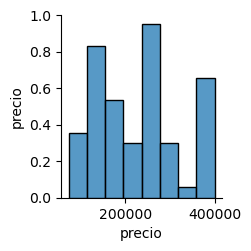

In [3]:
'''Histograma de la variable precios'''
sns.pairplot(df_casas[["precio"]])

c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


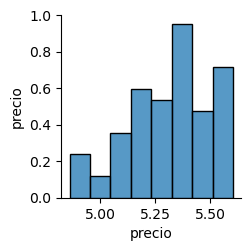

In [4]:
'''Transformación a log10
- Reducción de la escala
- Manejo de valores atípicos
- Transformación de datos no lineales
- Facilita la interpretación
- Estabilización de la varianza'''
sns.pairplot(np.log10(df_casas[["precio"]]))

In [5]:
'''Obtenemos información de los datos'''
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Titulo               67 non-null     object 
 1   Localización         67 non-null     object 
 2   precio               67 non-null     int64  
 3   baños                67 non-null     int64  
 4   año                  46 non-null     float64
 5   trastero             67 non-null     int64  
 6   orientación          14 non-null     object 
 7   piso                 66 non-null     object 
 8   habitaciones         67 non-null     float64
 9   metros reales        67 non-null     int64  
 10  condición            67 non-null     object 
 11  armarios empotrados  67 non-null     int64  
 12  terraza              67 non-null     int64  
 13  balcón               67 non-null     int64  
 14  jardín               67 non-null     int64  
 15  garaje               67 non-null     int64

# 1. Separación Train y Test

In [6]:
'''Separamos las variables para entrenar el modelo en X
y las variables a predecir en Y

   x = nuestro dataframe sin las variables Año, Titulo ni precio                     (No aportan información y no podemos incluir el precio en ese set)
   y = la columna precio '''
x, y = df_casas.drop(["Titulo", "año", "precio"], axis = 1), df_casas["precio"]

'''Separamos datos de entrenamiento y de prueba'''
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [7]:
'''Obtenemos los nombres de las variables en el DataFrame de los train'''
nombres_columnas = x.columns.tolist()
nombres_columnas

['Localización',
 'baños',
 'trastero',
 'orientación',
 'piso',
 'habitaciones',
 'metros reales',
 'condición',
 'armarios empotrados',
 'terraza',
 'balcón',
 'jardín',
 'garaje',
 'calefacción',
 'aire acondicionado']

# 2. Crear prepocesador

In [8]:
'''Creamos un preprocesador que le vamos a pasar columnas categoricas y numericas,
   a las columnas categoricas les vamos a hacer un OneHotEncoder que transforma las variables de texto en 0 y 1'''

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

'''procesamos las varaibles de texto (str) a numeros 0 y 1 (float)'''
columnas_category = ["Localización", "orientación", "piso", "condición"]
columnas_numericas = nombres_columnas

prepocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), columnas_category),            # transforma las variables de texto en 0 y 1
    remainder="passthrough",
    verbose_feature_names_out=False,
)

# 3. Creamos un pipeline

In [113]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
import scipy as sp

'''Hacemos un pipeline que me tiene en cuenta el preprocesador que me cambia las categorias a numeros y seleccionamos un modelo RidgeRegressor
definimos una función de activación que me va a predecir el logaritmo en base 10 del precio'''

model = make_pipeline(
    prepocessor,
    TransformedTargetRegressor(
        regressor = Ridge(alpha = 1e-10), func=np.log10, inverse_func=sp.special.exp10),   # Vamos a predecir el logaritmo del precio de las casas
)

# 4. Entrenar modelo

In [91]:
model.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Localización',
                                                   'orientación', 'piso',
                                                   'condición'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [92]:
'''Veamos la efectividad del modelo con los datos de entrenamiento y de test'''

from sklearn.metrics import median_absolute_error

y_pred = model.predict(x_train)                  # Creamos una variable para predecir sobre los datos de entrenamiento

mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} euros"            # creamos una variable texto
print("El mae para la predicción para train_set es:", mae )

y_pred = model.predict(x_test)                    # Creamos una variable para predecir sobre los datos de testeo
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} euros"           # Le añadimos al texto esto
print("El mae para la predicción para test_set es:", mae )

El mae para la predicción para train_set es: 19190.036031936062
El mae para la predicción para test_set es: 21123.624915425724


In [89]:
string_score

'MAE on training set: 19190.21 euros\nMAE on testing set: 21124.06 euros'

Text(0.5, 0, 'Truths')

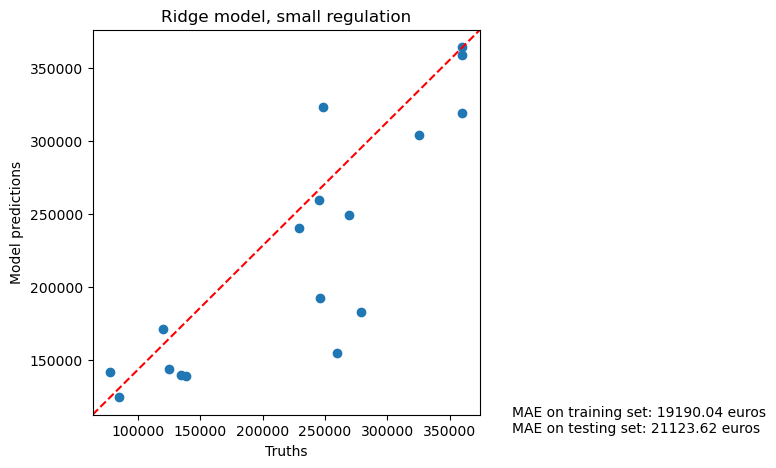

In [61]:
import matplotlib.pyplot as plt

'''Visualización:
De los resultados del mae para los dos escenarios, tenemos que para los datos de entrenamiento, tenemos un error de 19190 euros
y para los datos de testeo tenemos un error de 21123 euros'''

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(400000, 100000, string_score)
plt.title("Ridge model, small regulation")
plt.ylabel("Model predictions")
plt.xlabel("Truths")

# ¿Cuanto aporta cada variable?

- Coeficientes de regresión (beta_i): En un modelo de regresión lineal, tienes un conjunto de coeficientes (beta_i) que multiplican las variables predictoras (x_i). 

Estos coeficientes representan la contribución de cada variable predictora al modelo. 

Por ejemplo, en una regresión simple (una variable predictora), la relación sería de la forma y = beta_0 + beta_1 * x. Aquí, beta_0 es el intercepto y 
beta_1 es el coeficiente asociado a la variable predictora x.

- Desviación estándar (std): La desviación estándar es una medida de dispersión que indica cuánto se alejan los valores individuales de la media en un conjunto de datos. Es una medida de la variabilidad de los datos.

Si tienes un conjunto de datos unidimensional x, std(x) sería la desviación estándar de esos datos.

- Multiplicación de coeficientes por desviación estándar:

model[-1].regressor_.coef_: Estos son los coeficientes aprendidos por el modelo de regresión.
x_train_preprocessed.std(axis=0): Estas son las desviaciones estándar de las características originales.
La multiplicación model[-1].regressor_.coef_ * x_train_preprocessed.std(axis=0) realiza una operación elemento a elemento. Cada coeficiente se multiplica por la desviación estándar correspondiente de la variable predictora.

# 5. Peso de cada variable

In [14]:
'''Obtenemos el modelo creado'''
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Localización',
                                                   'orientación', 'piso',
                                                   'condición'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [15]:
'''Seleccionamos todo el modelo expecto el último componente'''
model[:-1]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Localización',
                                                   'orientación', 'piso',
                                                   'condición'])],
                                   verbose_feature_names_out=False))])

In [16]:
'''Obtenemos el nombre de las caracteristicas de salida
Aplicando este comando nos arroja un arreglo con el nombre de 22 elementos'''
feature_names = model[:-1].get_feature_names_out()
feature_names

array(['Localización_Vallès Occidental', 'orientación_este',
       'orientación_norte', 'orientación_sur', 'orientación_nan',
       'piso_1 planta', 'piso_2 plantas', 'piso_3 plantas',
       'piso_4 plantas', 'piso_nan',
       'condición_Segunda mano/para reformar', 'baños', 'trastero',
       'habitaciones', 'metros reales', 'armarios empotrados', 'terraza',
       'balcón', 'jardín', 'garaje', 'calefacción', 'aire acondicionado'],
      dtype=object)

In [17]:
'''Para obtener los coeficiente del modelo de regresión, aplicamos
Estos coeficientes corresponden a cada uno de los 22 elementos'''
model[-1].regressor_.coef_

array([ 0.00646876, -0.10766874,  0.02654212,  0.0624771 ,  0.01864877,
        0.05215487,  0.16200215, -0.04994875, -0.16597108,  0.00178024,
       -0.00959126,  0.07187018,  0.0827038 , -0.01442547,  0.00069595,
        0.02033396,  0.01006652, -0.0809354 ,  0.        , -0.02299197,
        0.04066816, -0.25383907])

In [18]:
feature_names = model[:-1].get_feature_names_out()

'''Asignamos los coeficientes a la columna llamada "Coefficientes", y los índices se establecen 
   utilizando los nombres de las características de salida obtenidos anteriormente'''
coefs = pd.DataFrame(model[-1].regressor_.coef_, columns = ["Coefficientes"], index = feature_names)
coefs

,Coefficientes
Localización_Vallès Occidental,0.006469
orientación_este,-0.107669
orientación_norte,0.026542
orientación_sur,0.062477
orientación_nan,0.018649
piso_1 planta,0.052155
piso_2 plantas,0.162002
piso_3 plantas,-0.049949
piso_4 plantas,-0.165971
piso_nan,0.001780


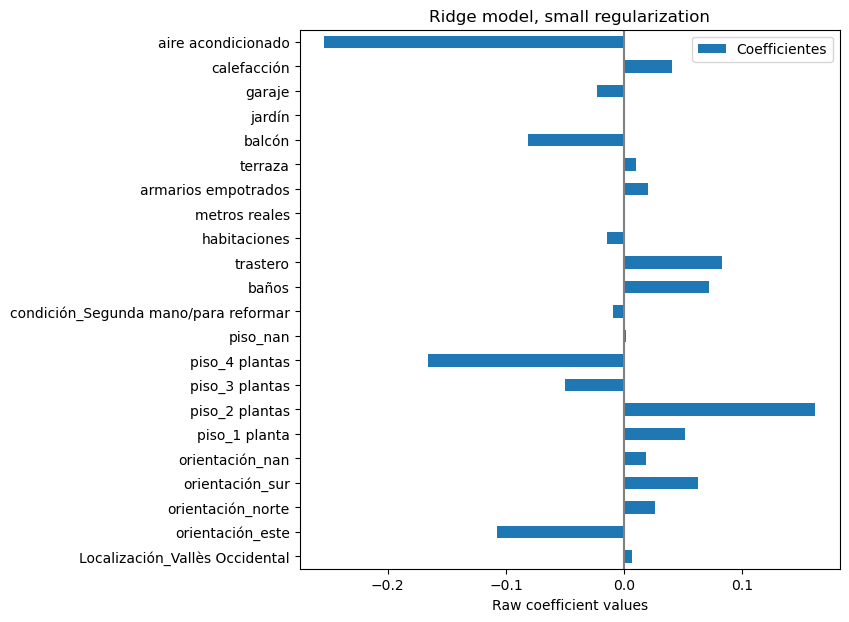

In [19]:
'''Acá no tenemos los datos en la misma escala'''

coefs.plot.barh(figsize = (9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

# Aplicamos el siguiente comando para ver la varianza que tenemos en cada variable

In [20]:
'''Varianza en cada variable'''
x_train_preprocessed = pd.DataFrame(
    model[:-1].transform(x_train), columns=feature_names
)

x_train_preprocessed.head()

,Localización_Vallès Occidental,orientación_este,orientación_norte,orientación_sur,orientación_nan,piso_1 planta,piso_2 plantas,piso_3 plantas,piso_4 plantas,piso_nan,...,trastero,habitaciones,metros reales,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,4.0,160.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,7.0,386.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,241.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,4.0,259.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


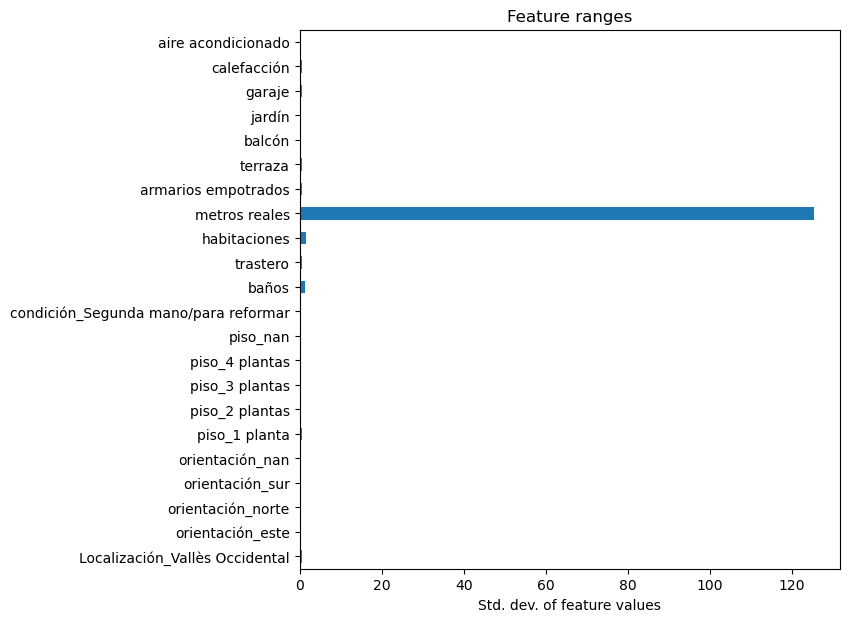

In [21]:
'''Calculamos la desviación estandar de cada variable y tenemos que metros reales tiene una alta std'''
x_train_preprocessed.std(axis=0).plot.barh(figsize=(9,7))
plt.title("Feature ranges")
plt.xlabel("Std. dev. of feature values")
plt.subplots_adjust(left=0.3)

# Correción de la varianza

La multiplicación de los coeficientes de regresión por la desviación estándar de las características originales (en este caso, x_train_preprocessed.std(axis=0)) tiene el efecto de escalar los coeficientes por la variabilidad de las características originales.

En un modelo de regresión, los coeficientes representan el cambio en la variable de respuesta por unidad de cambio en la variable predictora correspondiente, manteniendo todas las demás variables constantes. Al multiplicar los coeficientes por la desviación estándar de las características, estás ajustando su escala para reflejar cómo cambia la variable de respuesta en términos de desviaciones estándar de las características originales.

Es decir, la expresión model[-1].regressor_.coef_ * x_train_preprocessed.std(axis=0) nos da una idea de cómo cambia la variable de respuesta por desviación estándar de cada característica original, basándose en los coeficientes del modelo. Este tipo de análisis puede ser útil para comprender la importancia relativa de diferentes características en la predicción del modelo.

° Interpretación:

- Un coeficiente grande multiplicado por una desviación estándar grande indica que esa variable tiene un impacto significativo en la predicción del modelo.
- Un coeficiente pequeño multiplicado por una desviación estándar grande indica que esa variable tiene un impacto relativamente menor en la predicción.

Esta operación te da una idea de la contribución relativa de cada variable predictora en términos de la variabilidad (desviación estándar) que aporta al modelo.

In [22]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_ * x_train_preprocessed.std(axis=0),           # Multiplicamos los coeficientes por la varianza calculada
    columns = ["Coefficient importance"],
    index=feature_names
)

coefs

,Coefficient importance
Localización_Vallès Occidental,0.003244
orientación_este,-0.029506
orientación_norte,0.005254
orientación_sur,0.012367
orientación_nan,0.006906
piso_1 planta,0.026003
piso_2 plantas,0.069891
piso_3 plantas,-0.011983
piso_4 plantas,-0.050297
piso_nan,0.000252


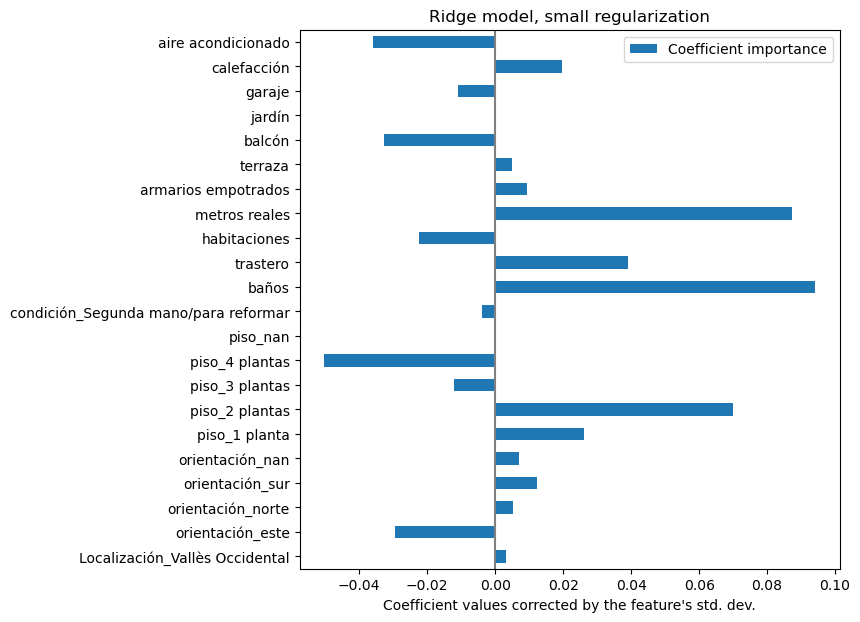

In [23]:
'''Acá si podemos ver la importancia de cada coeficiente'''
coefs.plot(kind="barh", figsize=(9,7))
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

# 6. Utilizamos cross validation

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)   # Creamos un objeto segmentado en 5 partes y que se haga el entrenamiento y predicción 5 veces

cv_model = cross_validate(
    model,                     # le ponemos el modelo
    x,                         # datos x
    y,                         # datos y
    cv=cv,                     # le ponemos el objeto creado
    return_estimator=True,
    n_jobs=2,
)

coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_ * est[:-1].transform(x.iloc[train_idx]).std(axis=0)
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(x,y))
    ],
    columns = feature_names
)

coefs

,Localización_Vallès Occidental,orientación_este,orientación_norte,orientación_sur,orientación_nan,piso_1 planta,piso_2 plantas,piso_3 plantas,piso_4 plantas,piso_nan,...,trastero,habitaciones,metros reales,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
0,0.021144,-0.007143,-0.001120,-0.002820,0.018250,0.011282,0.058132,0.016277,-0.055428,-0.002791,...,0.032325,-0.027036,0.077213,0.025161,0.042121,-0.010553,0.000000,-0.001147,-0.026428,-0.023089
1,0.001657,-0.025915,0.010087,0.005700,0.002982,0.027785,0.062354,0.001514,-0.055908,-0.000447,...,0.043659,-0.011367,0.085824,0.005746,0.017722,-0.013155,0.000000,-0.007107,-0.000988,-0.033620
2,0.035233,-0.044977,0.011249,0.036918,-0.018268,0.033457,0.100838,-0.024420,-0.052260,-0.002306,...,0.070595,-0.011808,0.094547,0.007102,0.015454,-0.026619,0.000000,-0.044137,-0.020295,-0.025158
3,-0.004761,-0.029715,0.016781,0.002625,0.001907,0.031642,0.085525,-0.000012,-0.061747,-0.006876,...,0.029079,-0.016189,0.095299,-0.018012,0.018786,0.031884,0.000000,0.009675,-0.023601,-0.050836
4,0.003538,-0.003472,0.000936,0.000586,0.003358,0.019003,0.066129,-0.010443,-0.046288,-0.045975,...,-0.014440,0.051105,-0.002956,0.000264,-0.006789,0.000000,-0.000018,0.026378,-0.021563,NaN
5,0.006436,-0.038242,0.015132,0.004375,0.002440,0.021549,0.079787,-0.004607,-0.061892,-0.002026,...,-0.024432,0.081731,-0.009367,0.017842,-0.008895,0.000000,-0.016164,0.007356,-0.021267,NaN
6,0.018694,-0.023497,0.006610,0.019452,-0.002492,0.024674,0.078449,-0.010952,-0.050002,0.000411,...,0.035508,-0.011132,0.088532,0.016737,0.012223,-0.032429,0.000000,-0.018853,-0.006586,-0.029396
7,0.015390,-0.007228,-0.005557,0.002719,0.018691,0.040166,0.077968,0.004604,-0.061225,-0.000824,...,0.050624,-0.016618,0.099340,0.046153,0.038278,0.015817,0.000000,0.013182,-0.026655,-0.020113
8,0.007277,-0.019254,0.013610,0.008588,-0.005644,0.021355,0.065896,-0.001437,-0.059679,-0.000927,...,0.048680,-0.029416,0.106629,-0.021079,0.023206,-0.010699,0.000000,-0.006726,-0.009815,-0.045335
9,0.014064,-0.010390,0.004808,-0.000663,0.002459,-0.001246,0.055733,0.010965,-0.057324,0.000629,...,0.034197,0.001618,0.048389,-0.000914,0.004253,0.000774,0.000000,-0.006374,-0.012639,-0.031833


c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


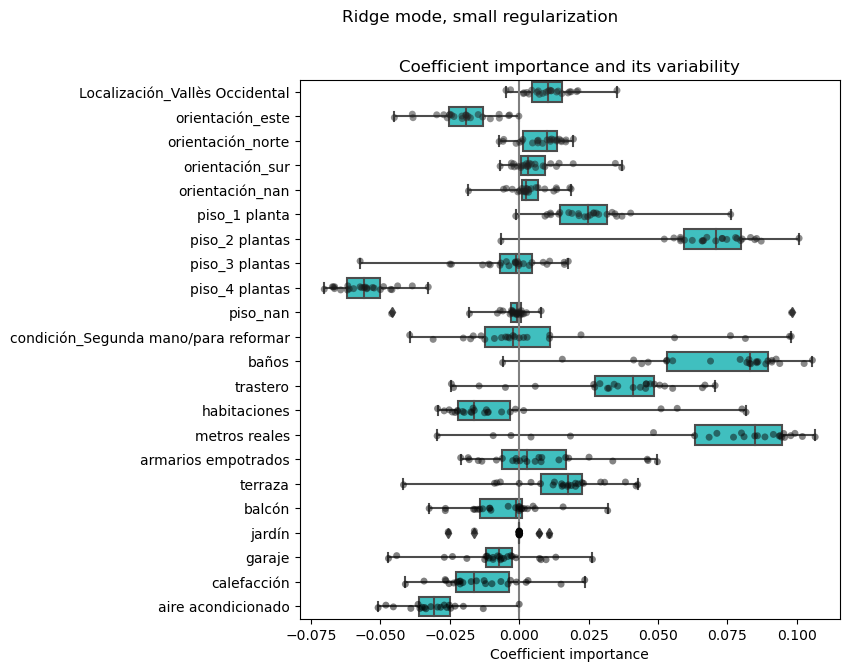

In [25]:
'''Notemos que todas las variables tienen una alta varianza, 
   generalmente, si encontramos variables cuya varianza es muy baja 
   se puede asumir que la importancia de esta variable no es tan grande'''

plt.figure(figsize=(9,7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.suptitle("Ridge mode, small regularization")
plt.subplots_adjust(left=0.3)

Text(0.5, 1.0, 'Co-variations of coefficient for habitaciones and metros reales across folds')

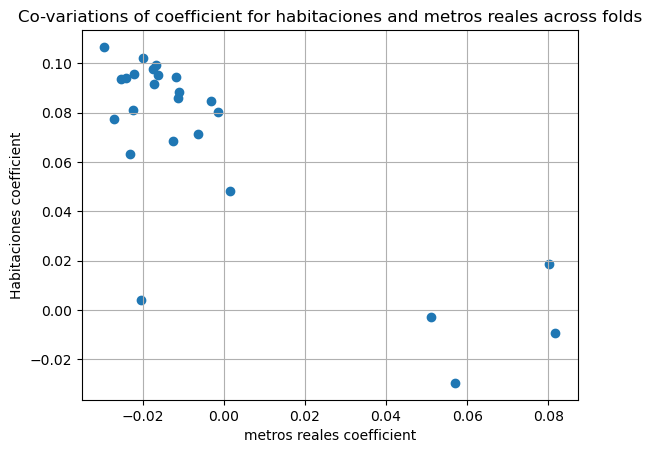

In [26]:
'''Exploramos alguna correlación entre dos variables'''
plt.ylabel("Habitaciones coefficient")
plt.xlabel("metros reales coefficient")
plt.grid(True)

plt.scatter(coefs["habitaciones"], coefs["metros reales"])
plt.title("Co-variations of coefficient for habitaciones and metros reales across folds")

# Prueba sin la variable habitaciones

In [32]:
'''Removemos habitaciones del dataframe para ver sin esta variable como funciona el modelo'''
index_to_remove = np.where(feature_names == 'habitaciones')[0]

feature_names_r = np.delete(feature_names, index_to_remove)

feature_names_r

array(['Localización_Vallès Occidental', 'orientación_este',
       'orientación_norte', 'orientación_sur', 'orientación_nan',
       'piso_1 planta', 'piso_2 plantas', 'piso_3 plantas',
       'piso_4 plantas', 'piso_nan',
       'condición_Segunda mano/para reformar', 'baños', 'trastero',
       'metros reales', 'armarios empotrados', 'terraza', 'balcón',
       'jardín', 'garaje', 'calefacción', 'aire acondicionado'],
      dtype=object)

In [33]:
columns_to_drop = ["habitaciones"]

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)   # Creamos un objeto segmentado en 5 partes y que se haga el entrenamiento y predicción 5 veces

cv_model = cross_validate(
    model,                     # le ponemos el modelo
    x.drop(columns=columns_to_drop),                         # datos x
    y,                         # datos y
    cv=cv,                     # le ponemos el objeto creado
    return_estimator=True,
    n_jobs=2,
)

coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_ * est[:-1].transform(x.drop(columns=columns_to_drop).iloc[train_idx]).std(axis=0)
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(x,y))
    ],
    columns = feature_names_r
)

coefs

,Localización_Vallès Occidental,orientación_este,orientación_norte,orientación_sur,orientación_nan,piso_1 planta,piso_2 plantas,piso_3 plantas,piso_4 plantas,piso_nan,...,baños,trastero,metros reales,armarios empotrados,terraza,balcón,jardín,garaje,calefacción,aire acondicionado
0,0.021468,-0.004668,0.000475,-0.005312,0.012502,0.011575,0.060243,0.019098,-0.059949,-0.002731,...,0.069935,0.032556,0.056606,0.021948,0.035870,-0.004858,0.000000,-0.001979,-0.030792,-0.020727
1,0.001436,-0.023248,0.009782,0.003915,0.001902,0.027169,0.062817,0.001693,-0.056009,-0.000457,...,0.082885,0.042694,0.078380,0.006578,0.017459,-0.012818,0.000000,-0.005093,-0.002968,-0.033024
2,0.033810,-0.042755,0.011068,0.036225,-0.019946,0.033703,0.101434,-0.025536,-0.052714,-0.001694,...,0.084443,0.068792,0.086317,0.007163,0.012730,-0.024724,0.000000,-0.041550,-0.021396,-0.025135
3,-0.008331,-0.027174,0.016588,0.001037,0.000967,0.029659,0.086634,-0.000441,-0.061814,-0.006432,...,0.093166,0.026289,0.082039,-0.017952,0.015206,0.034131,0.000000,0.012566,-0.021817,-0.051949
4,0.001272,-0.001577,0.001110,-0.002050,0.003032,0.018097,0.066930,-0.010219,-0.046509,-0.047262,...,0.040462,0.041589,-0.002291,-0.002802,-0.004612,0.000000,0.002677,0.026215,-0.020371,NaN
5,0.006508,-0.036183,0.016142,0.003162,-0.002015,0.023819,0.084498,-0.004183,-0.066908,0.001148,...,0.056062,0.063737,-0.009911,0.013022,-0.004579,0.000000,-0.015725,0.003554,-0.020134,NaN
6,0.017947,-0.020983,0.006522,0.017147,-0.003129,0.024686,0.079025,-0.011736,-0.050935,0.001114,...,0.101629,0.033355,0.081048,0.015718,0.011883,-0.029541,0.000000,-0.016028,-0.007417,-0.029500
7,0.015685,-0.005271,-0.003690,-0.001465,0.017775,0.036793,0.077862,0.004972,-0.058507,-0.001634,...,0.015957,0.050285,0.091866,0.046942,0.029068,0.020631,0.000000,0.016026,-0.026502,-0.018181
8,-0.000194,-0.016017,0.013384,0.005248,-0.006890,0.020001,0.067864,-0.001780,-0.061609,-0.000224,...,0.105759,0.044293,0.083901,-0.019710,0.016828,-0.007486,0.000000,-0.002707,-0.005570,-0.045545
9,0.014176,-0.010732,0.004821,-0.000447,0.002667,-0.001108,0.055787,0.010863,-0.057300,0.000615,...,0.093708,0.034470,0.049569,-0.001087,0.004361,0.000691,0.000000,-0.006703,-0.012318,-0.031903


c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


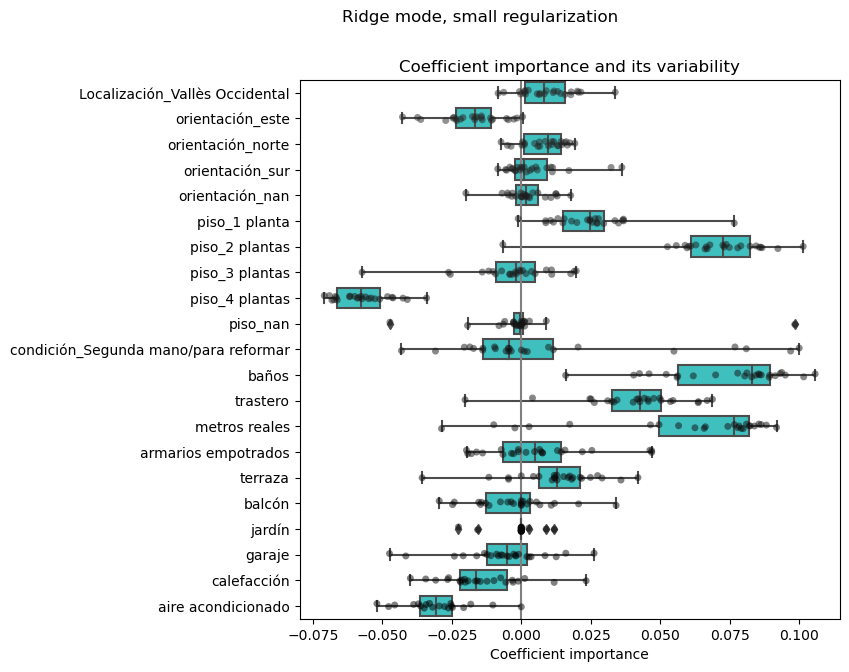

In [34]:
plt.figure(figsize=(9,7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.suptitle("Ridge mode, small regularization")
plt.subplots_adjust(left=0.3)

# 7. Volvemos a aplicar el modelo
- Vamos a hacer que haga pruebas con 3 alpha para ver cual es mejor
- Notar que en este modelo utilizamos RidgeCV y en el anterior Ridge

In [96]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-10, 10, 10000) # Secuencia log de 10k numeros que inicia en -10 termina en 10
model = make_pipeline(
    prepocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=alphas),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)

model.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Localización',
                                                   'orientación', 'piso',
                                                   'condición'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=RidgeCV(alphas=array([1.00000000e-10, 1.00461625e-10, 1.00925382e-10, ...,
       9.90831032e+09, 9.95404959e+09, 1.00000000e+10]))))])

In [97]:
'''¿Cual es el mejor alpha?'''
model[-1].regressor_.alpha_

5.212807736392574

In [98]:
y_pred = model.predict(x_train)                  # Creamos una variable para predecir sobre los datos de entrenamiento

mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} euros"            # creamos una variable texto
print("El mae para la predicción para train_set es:", mae )

y_pred = model.predict(x_test)                    # Creamos una variable para predecir sobre los datos de testeo
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} euros"           # Le añadimos al texto esto
print("El mae para la predicción para test_set es:", mae )

El mae para la predicción para train_set es: 23369.331682513148
El mae para la predicción para test_set es: 26324.991653614532


Text(0.5, 0, 'Truths')

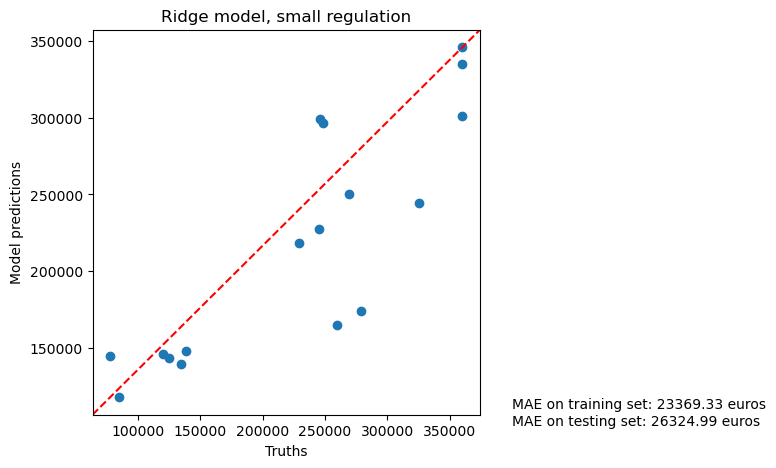

In [99]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(400000, 100000, string_score)
plt.title("Ridge model, small regulation")
plt.ylabel("Model predictions")
plt.xlabel("Truths")

# 8. Predicción final

In [114]:
'''Vamos a entrenar el modelo con todos los datos'''
model.fit(x, y)

c:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.10957e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Localización',
                                                   'orientación', 'piso',
                                                   'condición'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [115]:
y_pred = model.predict(x)                  # Creamos una variable para predecir sobre los datos de entrenamiento

mae = median_absolute_error(y, y_pred)
string_score = f"MAE on training set: {mae:.2f} euros"            # creamos una variable texto
print("El mae para la predicción para train_set es:", mae )

y_pred = model.predict(x)                    # Creamos una variable para predecir sobre los datos de testeo
mae = median_absolute_error(y, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} euros"           # Le añadimos al texto esto
print("El mae para la predicción para test_set es:", mae )

El mae para la predicción para train_set es: 14806.073899057548
El mae para la predicción para test_set es: 14806.073899057548


Text(0.5, 0, 'Truths')

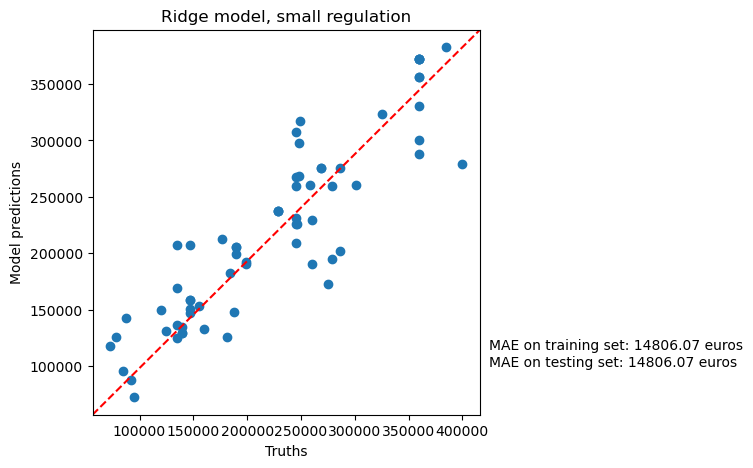

In [116]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(425000, 100000, string_score)
plt.title("Ridge model, small regulation")
plt.ylabel("Model predictions")
plt.xlabel("Truths")

# 9. Predicción final sin la variable habitaciones

In [117]:
'''Vamos a entrenar el modelo con todos los datos'''
columns_to_drop = ["habitaciones"]
model.fit(x.drop(columns=columns_to_drop), y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Localización',
                                                   'orientación', 'piso',
                                                   'condición'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [118]:
y_pred = model.predict(x.drop(columns=columns_to_drop))                  # Creamos una variable para predecir sobre los datos de entrenamiento

mae = median_absolute_error(y, y_pred)
string_score = f"MAE on training set: {mae:.2f} euros"            # creamos una variable texto
print("El mae para la predicción para train_set es:", mae )

y_pred = model.predict(x.drop(columns=columns_to_drop))                    # Creamos una variable para predecir sobre los datos de testeo
mae = median_absolute_error(y, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} euros"           # Le añadimos al texto esto
print("El mae para la predicción para test_set es:", mae )

El mae para la predicción para train_set es: 18288.06437440528
El mae para la predicción para test_set es: 18288.06437440528


Text(0.5, 0, 'Truths')

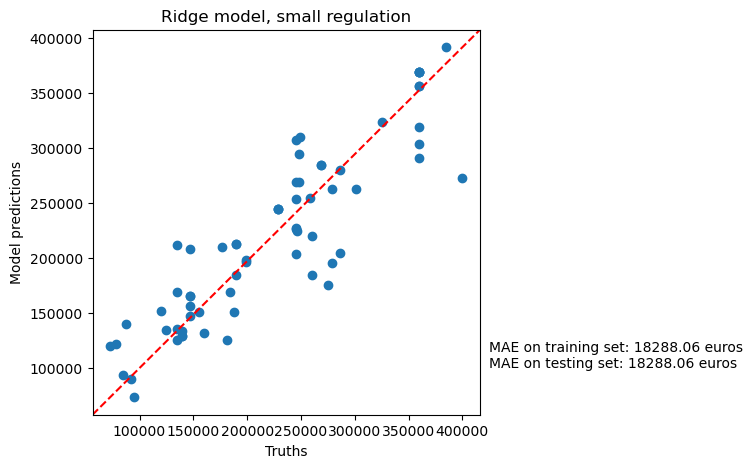

In [119]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(425000, 100000, string_score)
plt.title("Ridge model, small regulation")
plt.ylabel("Model predictions")
plt.xlabel("Truths")